In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy 

from scipy import stats  
import matplotlib

from scipy.stats import shapiro
from scipy.special import kolmogorov
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import f_oneway

from statsmodels.stats.multicomp import pairwise_tukeyhsd

from pingouin import ancova


%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})

In [3]:
df = pd.read_csv("Diet_R.csv")
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8



# Data information

In [4]:
df.info()
print('-'*40,'\n','Shape :',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB
---------------------------------------- 
 Shape : (78, 7)


In [5]:
gender_check = []
for i in df['gender']: 
    if i == '0': gender_check.append('Female')
    elif i =='1' : gender_check.append('Male')
    else : gender_check.append('Nan')
len(gender_check)

78

In [6]:
df.insert(2,'gender_note',gender_check)

In [7]:
df

,Person,gender,gender_note,Age,Height,pre.weight,Diet,weight6weeks
0,25,,Nan,41,171,60,2,60.0
1,26,,Nan,32,174,103,2,103.0
2,1,0,Female,22,159,58,1,54.2
3,2,0,Female,46,192,60,1,54.0
4,3,0,Female,55,170,64,1,63.3
...,...,...,...,...,...,...,...,...
73,74,1,Male,35,183,83,3,80.2
74,75,1,Male,49,177,84,3,79.9
75,76,1,Male,28,164,85,3,79.7
76,77,1,Male,40,167,87,3,77.8


In [8]:
# row 0,1 missing gender value -- > drop
df = df.drop([0, 1])
df

,Person,gender,gender_note,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,Female,22,159,58,1,54.2
3,2,0,Female,46,192,60,1,54.0
4,3,0,Female,55,170,64,1,63.3
5,4,0,Female,33,171,64,1,61.1
6,5,0,Female,50,170,65,1,62.2
...,...,...,...,...,...,...,...,...
73,74,1,Male,35,183,83,3,80.2
74,75,1,Male,49,177,84,3,79.9
75,76,1,Male,28,164,85,3,79.7
76,77,1,Male,40,167,87,3,77.8


In [9]:
df = df.set_index('Person').sort_index()
df

,gender,gender_note,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,,
1,0,Female,22,159,58,1,54.2
2,0,Female,46,192,60,1,54.0
3,0,Female,55,170,64,1,63.3
4,0,Female,33,171,64,1,61.1
5,0,Female,50,170,65,1,62.2
...,...,...,...,...,...,...,...
74,1,Male,35,183,83,3,80.2
75,1,Male,49,177,84,3,79.9
76,1,Male,28,164,85,3,79.7


# 1. Paired t-test
## - Ignore diet and test to see if weight has been lost

### Hypothetical Statement
$H_0: \mu_0 = \mu_1$.  Weight before 6 weeks has not been change 

$H_1: \mu_0 \neq \mu_1$.  Weight before 6 week has been change

In [10]:
stats, p = scipy.stats.ttest_ind(df['pre.weight'], df['weight6weeks'])
print('statistic =',stats,'\n','p =',p)
print("-"*40)
alpha = 0.05
if p < alpha:
    print('Reject H0 hypothesis. This mean weight before 6 week has been change.')    
else:
    print('Can not reject H0 hypothesis. This mean weight before 6 weeks has not been change .')

statistic = 3.0342255247628476 
 p = 0.0028431949414180584
----------------------------------------
Reject H0 hypothesis. This mean weight before 6 week has been change.


Text(0.5, 1.0, 'Weight before and after 6 week')

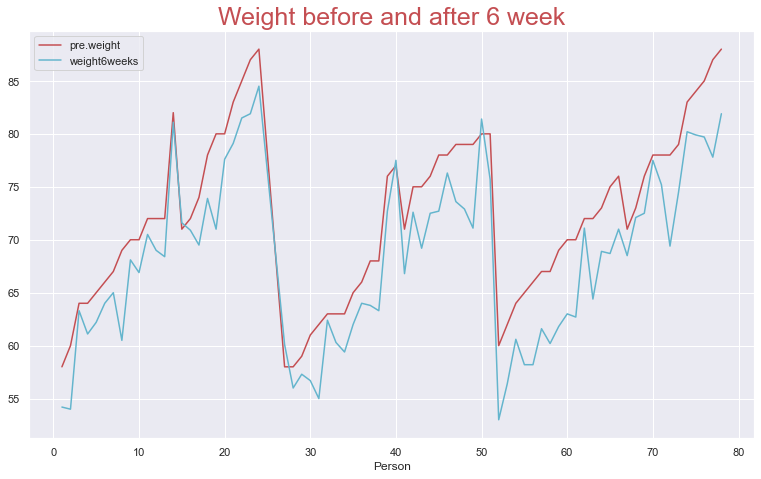

In [11]:
df[['pre.weight', 'weight6weeks']].plot(color= ['r', 'c'])
plt.title('Weight before and after 6 week', fontsize=25, color = 'r')

# 2. Compute variable
## Remove weight lost and get students to calculate it using before/after weights

In [12]:
weight_loss = df['pre.weight'] - df['weight6weeks']

In [13]:
df.insert(6, 'weight_loss', weight_loss)

In [14]:
df.sample(20)

,gender,gender_note,Age,Height,pre.weight,Diet,weight_loss,weight6weeks
Person,,,,,,,,
24,1,Male,40,190,88,1,3.5,84.5
53,0,Female,35,169,62,3,5.6,56.4
63,0,Female,35,171,72,3,7.6,64.4
37,0,Female,16,165,68,2,4.2,63.8
43,1,Male,54,196,75,2,5.8,69.2
18,1,Male,50,160,78,1,4.1,73.9
2,0,Female,46,192,60,1,6.0,54.0
66,0,Female,41,157,76,3,5.0,71.0
48,1,Male,40,171,79,2,6.1,72.9


Text(0, 0.5, 'Percent')

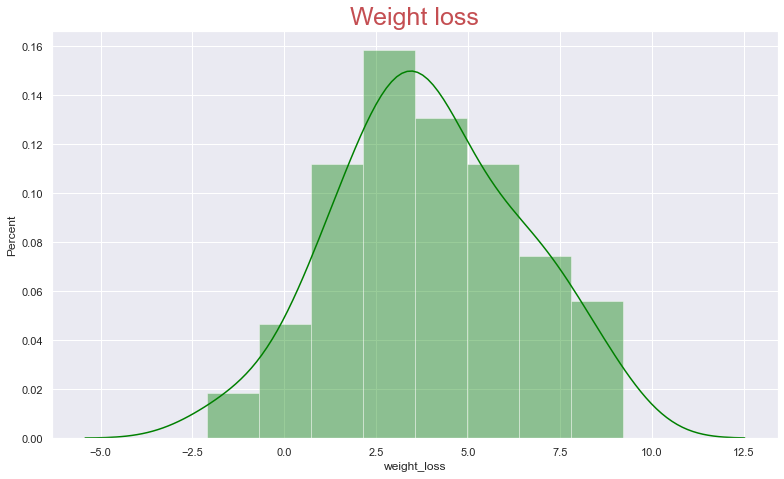

In [15]:
sns.distplot(df['weight_loss'],color = 'green')
plt.title('Weight loss', fontsize = 25, color = 'r')
plt.ylabel('Percent')

In [16]:
a = 0
for i in df['weight_loss']:
    if i < 0 : a += 1
print('No_person_weight_gain:',a)

No_person_weight_gain: 4


# 3. Summary Statistics (by Diet)

In [218]:
x = pd.DataFrame(df['Diet'].describe(include='all'))
x

,Diet
count,76.000000
mean,2.039474
std,0.823663
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [219]:
print('Diet var:',df['Diet'].var(),'\n','Diet mode:',df['Diet'].mode())

Diet var: 0.6784210526315783 
 Diet mode: 0    3
dtype: int64


In [220]:
diet_f = pd.DataFrame(df.groupby('Diet')['Diet'].count()) 
diet_f.columns = ['Frequency']
diet_f['Percent'] = diet_f/sum(diet_f['Frequency'])*100
diet_f

,Frequency,Percent
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


Text(0, 0.5, 'Percent')

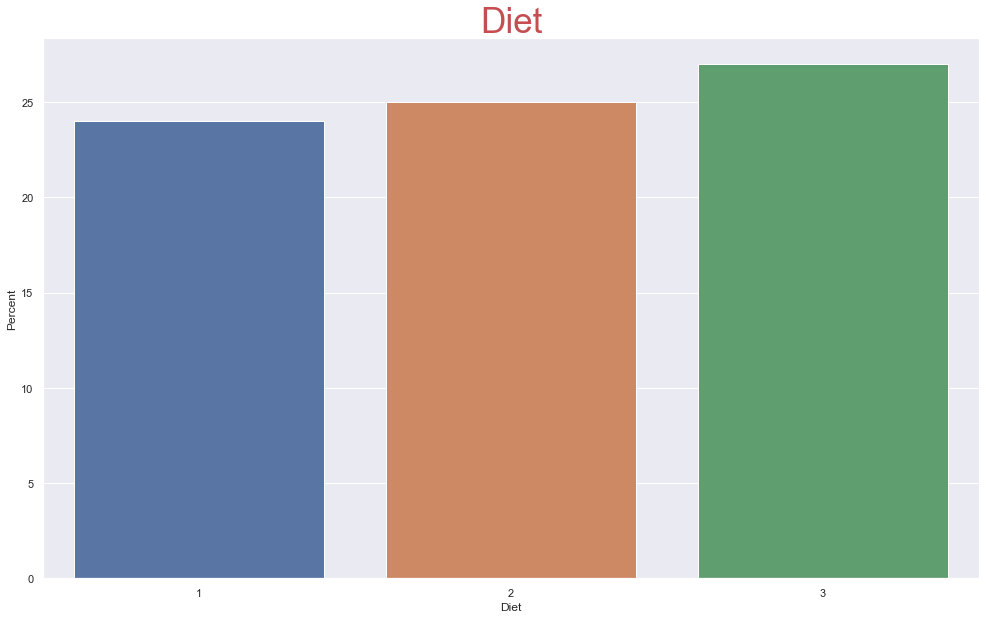

In [221]:
diet_f.reset_index(inplace= True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='Diet',y='Frequency',data = diet_f)
plt.title('Diet', color = 'r', fontsize = 35)
plt.ylabel('Percent')

# 4. One way ANOVA

### 4.1 Which diet was best for losing weight??

$H_0: \mu_0 = \mu_1$.There are no difference between the diets

$H_1: \mu_0 \neq \mu_1$. There are difference between the diets

In [222]:
# Only need Diet & weight_loss
data = df[['Diet', 'weight_loss']]
data

,Diet,weight_loss
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [223]:
diet = df.groupby('Diet').groups

In [224]:
diet1 = df['weight_loss'][diet[1]]
diet2 = df['weight_loss'][diet[2]]
diet3 = df['weight_loss'][diet[3]]
pd.DataFrame(diet1).T

Person,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
weight_loss,3.8,6.0,0.7,2.9,2.8,2.0,2.0,8.5,1.9,3.1,...,-0.6,1.1,4.5,4.1,9.0,2.4,3.9,3.5,5.1,3.5


### 4.1.1 Normal distribution test


In [225]:
def shapiro_test(diet):
    stat, p = shapiro(diet)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
list_diet = [diet1.sample(20),diet2.sample(20),diet3.sample(20)]
a = 1
for i in list_diet :
    print( '=='*30,'\n','Diet',a,'check')
    shapiro_test(i) 
    kolmogorov(i)
    a +=1
    
def kolmogorov(data):
    print("Kiểm định kolmogorov:")
    stat, p = kstest(rvs=data, cdf='norm', args=(np.mean(data), 
                                    np.std(data)))
    print('stat=%.3f, p=%.3f' % (stat, p))
        #print('k =',k , 'p =',p) 
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
              
def kd_thuan_nhat(list_diet):
    print('>'*75,'\n','Kiểm tra tính thuần nhất:')
    print("1.Bartlett:")
    stat, p = bartlett(list_diet[0],list_diet[1],list_diet[2])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    
    print("2.Levene:")
    stat, p = levene(list_diet[0],list_diet[1],list_diet[2])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    print(p < 0.05,'\n','~'*50) 
kd_thuan_nhat(list_diet)    

 Diet 1 check
stat=0.926, p=0.127
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Diet 2 check
stat=0.981, p=0.949
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Diet 3 check
stat=0.961, p=0.571
Sample looks Gaussian (fail to reject H0) 
 ..................................................
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
 Kiểm tra tính thuần nhất:
1.Bartlett:
stat = 0.046007344550609446 p = 0.9772588950029811
Sample looks Gaussian (fail to reject H0) 
 ..................................................
2.Levene:
stat = 0.09964122082801607 p = 0.9053194231784888
Sample looks Gaussian (fail to reject H0) 
 ..................................................
False 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


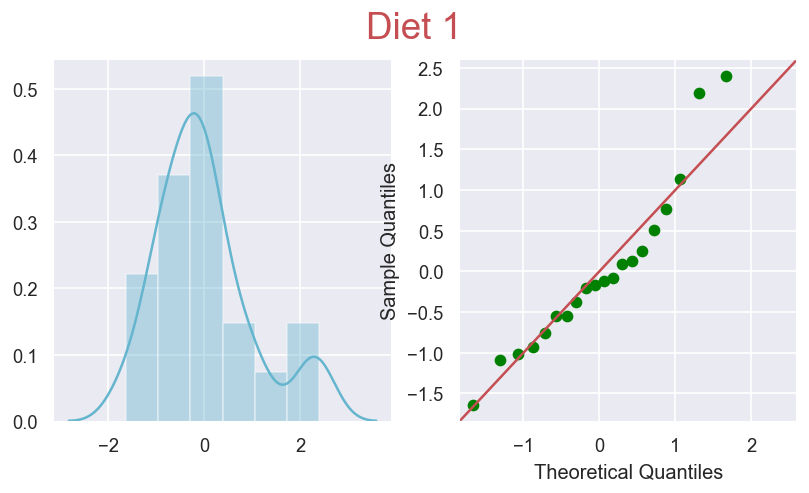

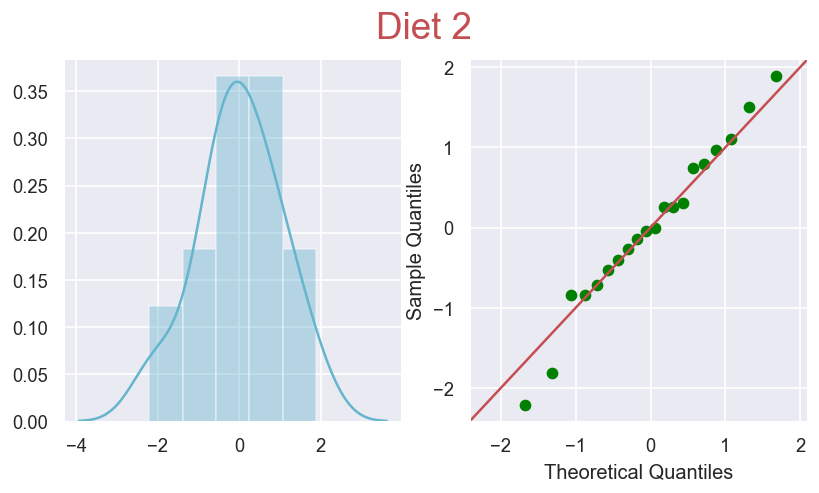

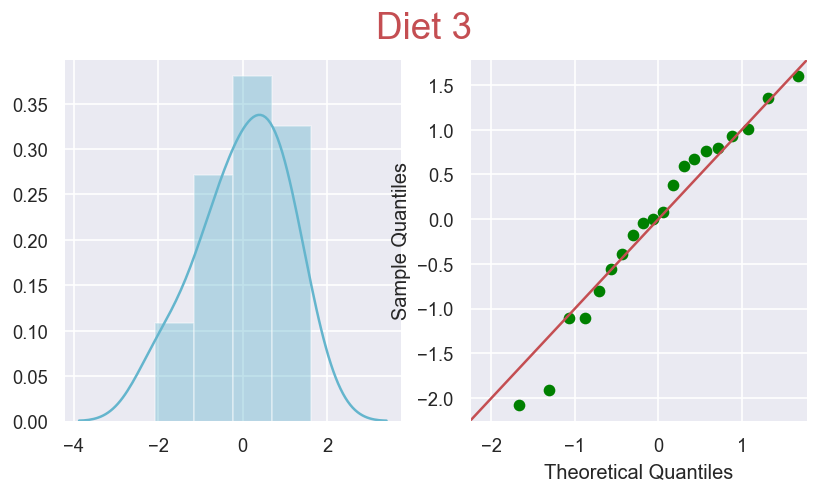

In [226]:
def dothi(data,a):
    
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))   
    dt = np.array(data)
    dt_chuan_hoa = (dt - np.mean(dt))/np.std(dt)
    plt.suptitle("Diet "+str(a), color = 'r', fontsize = 22)
    sns.distplot(dt_chuan_hoa, ax = axes[0],color = "c")
    sm.qqplot(dt_chuan_hoa, line="45", ax = axes[1],color = "green")
a = 1
for i in list_diet:
    dothi(i,a)
    a += 1

In [227]:
# ANOVA one-way
fvalue, pvalue = f_oneway(diet1,diet2,diet3)
print('f_value =',fvalue,'p_value =',pvalue)
if (p < alpha):
    print('Reject H0. There are difference between the diets')
else:
    print('Fail to reject H0. There are no difference between the diets')

f_value = 5.383104474859926 p_value = 0.006595853108669741
Reject H0. There are difference between the diets


In [228]:
model = ols('weight_loss ~ C(Diet)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


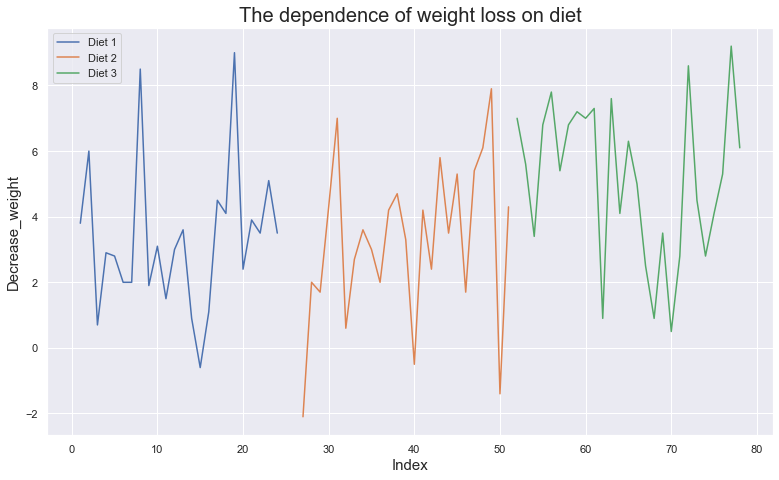

In [229]:
plt.plot(diet1)
plt.plot(diet2)
plt.plot(diet3)
plt.title("The dependence of weight loss on diet", fontsize=20)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Decrease_weight", fontsize=15)
plt.legend(["Diet 1", "Diet 2", "Diet 3"])

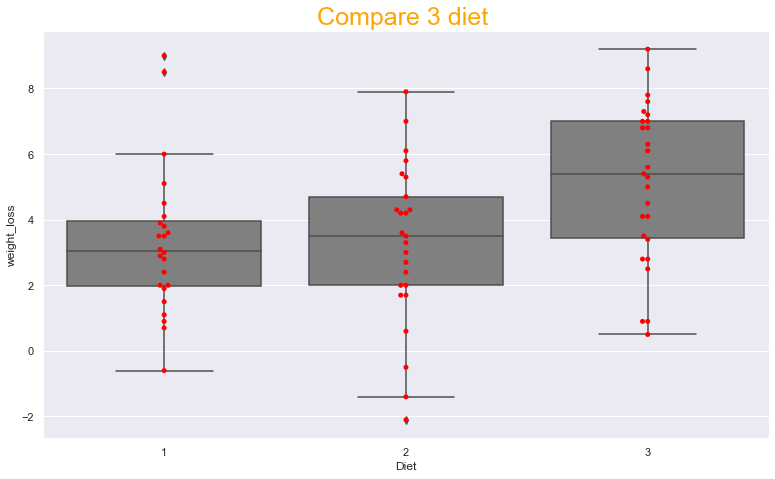

In [230]:
# EDA Skill 

sns.boxplot(x='Diet', y='weight_loss', data=df, color='gray')
sns.swarmplot(x="Diet", y="weight_loss", data=df, color='red')
plt.title('Compare 3 diet ', size=25, color = 'orange')
plt.show()

In [231]:
tukey = pairwise_tukeyhsd(endog=df['weight_loss'],
                          groups=df['Diet'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.032,0.9,-1.6531,1.5891,False
1,3,1.8481,0.0188,0.2567,3.4396,True
2,3,1.8801,0.0152,0.3057,3.4546,True


### Từ bảng tukey
Chỉ số p-adj cho thấy giữa Diet 3 có sự khác biệt so với Diet 1 và Diet 2 

Chỉ số meandiff của Diet 3 so với Diet 1 và Diet 2 là cao nhất --> Diet 3 có hiệu quả cao nhất


### 4.2: Are there gender differences for weight lost?

- Hypothesis building

$H_0:$ Weight loss depends on gender

$H_0:$ Weight loss regardless of gender

In [240]:
data_42 = df[['Diet','gender_note', 'weight_loss']]
data_42

,Diet,gender_note,weight_loss
Person,,,
1,1,Female,3.8
2,1,Female,6.0
3,1,Female,0.7
4,1,Female,2.9
5,1,Female,2.8
...,...,...,...
74,3,Male,2.8
75,3,Male,4.1
76,3,Male,5.3


### 4.1.1 Normal distribution test

$H_0$: Sample looks Gaussian 

$H_1$: Sample does not look Gaussian

In [164]:
dt = df.groupby('gender_note').groups
female_w_l = df['weight_loss'][dt['Female']]
female_w_l.name = 'Female'
male_w_l = df['weight_loss'][dt['Male']]
male_w_l.name = 'Male'

In [165]:
gd_list = [male_w_l,female_w_l]

for i in gd_list:
    print('='*40,'\n',i.name,':')
    shapiro_test(i) 
    kolmogorov(i)

def kd_thuan_nhat2(a):
    print('>'*75,'\n','Kiểm tra tính thuần nhất:')
    print("1.Bartlett:")
    stat, p = bartlett(a[0],a[1])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    
    print("2.Levene:")
    stat, p = levene(a[0],a[1])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n')
    else:
        print('Sample does not look Gaussian (reject H0)','\n')
    print(p < 0.05,'\n','~'*50)     

kd_thuan_nhat2(gd_list)

 Male :
stat=0.975, p=0.638
Sample looks Gaussian (fail to reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.090, p=0.933
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Female :
stat=0.970, p=0.305
Sample looks Gaussian (fail to reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.111, p=0.620
Sample looks Gaussian (fail to reject H0) 
 ..................................................
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
 Kiểm tra tính thuần nhất:
1.Bartlett:
stat = 0.0010952221531771032 p = 0.9735995151820288
Sample looks Gaussian (fail to reject H0) 
 ..................................................
2.Levene:
stat = 0.20197954804159896 p = 0.6544413235614229
Sample looks Gaussian (fail to reject H0) 

False 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


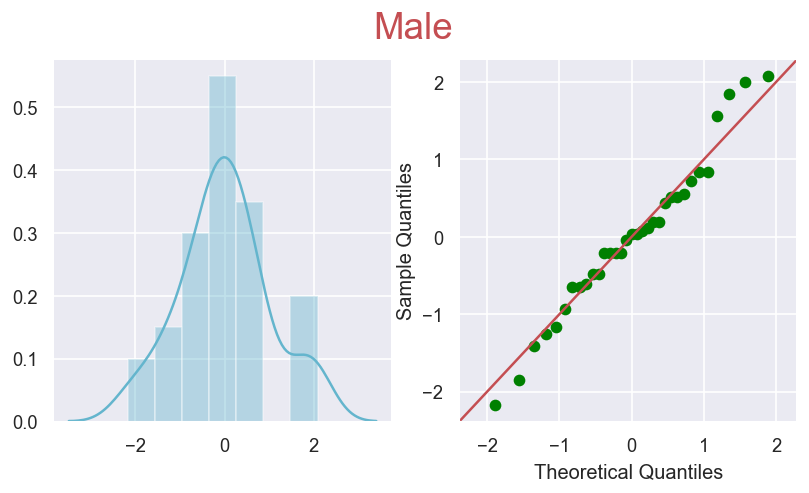

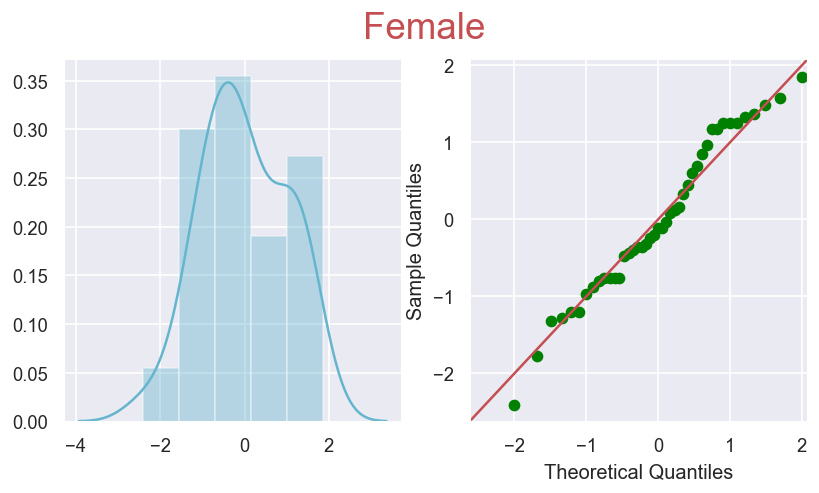

In [182]:
def dothi(data,a):
    
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))   
    dt = np.array(data)
    dt_chuan_hoa = (dt - np.mean(dt))/np.std(dt)
    plt.suptitle(str(a), color = 'r', fontsize = 22)
    sns.distplot(dt_chuan_hoa, ax = axes[0],color = "c")
    sm.qqplot(dt_chuan_hoa, line="45", ax = axes[1],color = "green")
    
for i in [male_w_l,female_w_l]:
    a = i.name
    dothi(i,a)

In [167]:
from scipy.stats import f_oneway
fvalue , p = f_oneway(female_w_l, male_w_l)
print('f_value =',fvalue,'p_value =',p)
alpha = 0.05
if (p < alpha):
    print('Reject H0. Weight loss depends on gender')
else:
    print('Fail to reject H0. Weight loss regardless of gender')

f_value = 0.04378592096006073 p_value = 0.8348273886348012
Fail to reject H0. Weight loss regardless of gender


In [168]:
model = ols('weight_loss ~ C(gender_note)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender_note),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [169]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['weight_loss'],
                          groups=df['gender_note'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Female,Male,0.1221,0.8397,-1.0408,1.2851,False


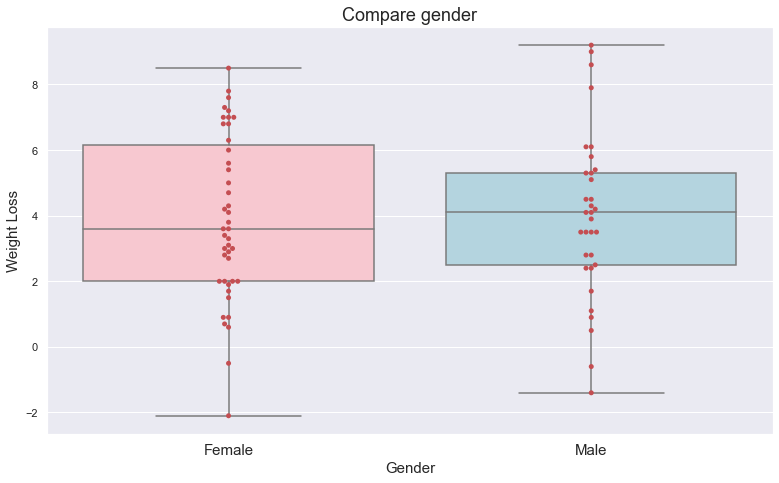

In [193]:
data_42 = data_42.replace(to_replace =['0','1'], 
                            value =['Female','Male'])
cl = ['pink','lightblue']
sns.boxplot(x = 'gender_note', y = 'weight_loss', data = data_42,palette = cl )
sns.swarmplot(x='gender_note', y= 'weight_loss', data = data_42,color = 'r')
plt.title('Compare gender', size=18)
plt.xticks(size=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Weight Loss',fontsize=15)
plt.show()

# 5. Two-way ANOVA
### Effect of diet and gender on weight lost

In [202]:
# Perform two-way ANOVA
model = ols('weight_loss ~ C(Diet) + C(gender_note) + C(Diet):C(gender_note)', data=df).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,130.235000,1.0,24.224678,0.000005
C(Diet),92.319621,2.0,8.586068,0.000463
C(gender_note),2.100000,1.0,0.390616,0.534008
C(Diet):C(gender_note),33.904068,2.0,3.153204,0.048842
Residual,376.329043,70.0,NaN,NaN


# 6. Interactions
## Means plot of weight lost by diet and gender

Text(0.5, 1.0, 'Means plot of weight lost by diet and gender')

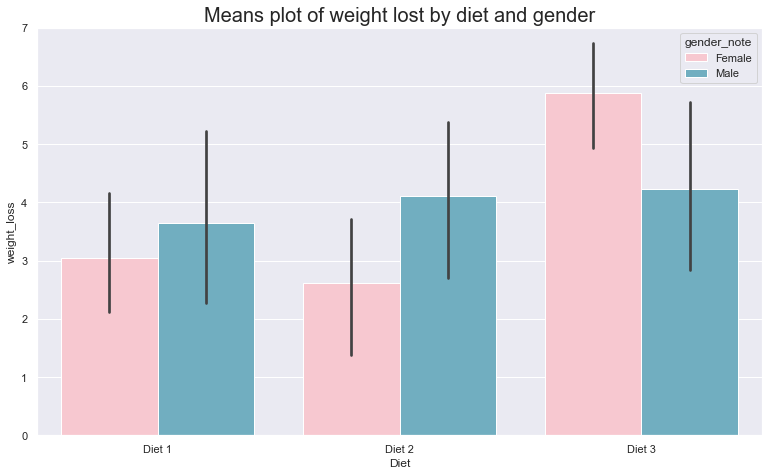

In [243]:
#sns.set_theme(style="whitegrid")
g=sns.barplot(x="Diet", y="weight_loss", hue="gender_note", data=data_42, palette=['pink','c'])
g.set_xticklabels(["Diet 1", "Diet 2", "Diet 3"])
g.set(ylim=(0, 7))
plt.title('Means plot of weight lost by diet and gender', size=20)

#  7. ANCOVA
### Add height to either ANOVA

In [257]:
df['gender']= pd.to_numeric(df['gender'])
ancova(data=df, dv='weight_loss', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN
